In [1]:
from ucimlrepo import fetch_ucirepo
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from model import Model
from matplotlib import pyplot as plt
import pandas as pd
np.random.seed(0)

In [2]:
def plot_loss_histories(loss_histories_, idx=0):
    fig_, axs = plt.subplots(1, len(loss_histories_), figsize=(15, 5))
    for i, (method, history_list) in enumerate(loss_histories_.items()):
        history = history_list[idx]  
        axs[i].plot(history, label='Logistic Loss')
        axs[i].set_title(f"Loss History, method: {method}")
        axs[i].set_xlabel("Iteration")
        axs[i].set_ylabel("Loss")
        axs[i].legend()
    plt.show()

In [3]:
def run_experiment(methods_, X_, y_, iter_=10):
    accuracies_ = {m: [] for m in methods_}
    loss_histories_ = {m: [] for m in methods_}
    for i in range(iter_):
        X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.2)
        for m in methods_:
            model_ = Model(method=m)
            model_.fit(X_train_, y_train_)
            loss_histories_[m].append(model_.get_loss_history())
            y_pred_ = model_.predict(X_test_)
            accuracies_[m].append(accuracy_score(y_test_, y_pred_))
    return accuracies_, loss_histories_

In [4]:
methods = ['L-BFGS-B', 'COBYLA', 'SLSQP']

## Generated dataset


In [5]:
n_samples = 1000 
n_features = 10  
X_train = np.random.randn(n_samples, n_features)
y_train = np.random.choice([-1, 1], size=n_samples)
loss_histories = {method: [] for method in methods}

In [20]:
optimal_parameters = {}

for method in methods:
    model = Model(method=method)
    model.fit(X_train, y_train, verbose=False)
    optimal_parameters[method] = model.get_optimal_parameters()

pd.DataFrame(optimal_parameters)

,L-BFGS-B,COBYLA,SLSQP
n,"[0.0, 0.10355011933398382, 0.0, 0.0, 0.0, 0.0,...","[-3.7190910139317987e-19, 0.10353766820125145,...","[0.0, 0.10355040217177214, 0.0, 0.0, 0.0, 0.0,..."
p,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-3.463377405441431e-19, -1.3366778711008568e-...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
w,"[0.0, 0.10355011933398382, 0.0, 0.0, 0.0, 0.0,...","[-2.557136084903675e-20, 0.10353766820125145, ...","[0.0, 0.10355040217177214, 0.0, 0.0, 0.0, 0.0,..."
b,-0.012754,-0.012756,-0.012752


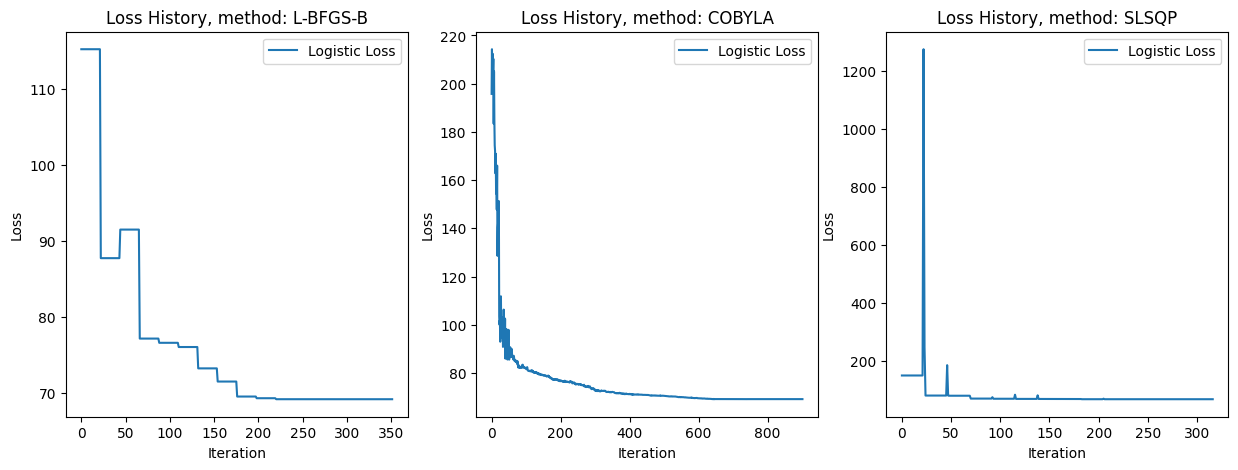

In [39]:
plot_loss_histories(loss_histories)

## UCI Dataset

### Breast Cancer Wisconsin Diagnostic

In [26]:
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
X = breast_cancer_wisconsin_diagnostic.data.features.to_numpy()
y = breast_cancer_wisconsin_diagnostic.data.targets.to_numpy().ravel()

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

label_mapping = {'M': -1, 'B': 1}
y = np.vectorize(label_mapping.get)(y)

In [27]:
accuracies_breast_cancer, loss_histories_breast_cancer = run_experiment(methods, X, y)
average_accuracies_breast_cancer = {method: np.mean(values) for method, values in accuracies_breast_cancer.items()}

/Users/zosia/Desktop/Optimization-in-Data-Analysis/model.py:25: RuntimeWarning: overflow encountered in exp
  loss = self.C * np.mean(np.log(1 + np.exp(-y * (np.dot(X, n-p) + b)))) + np.sum(n + p)
/Users/zosia/Desktop/Optimization-in-Data-Analysis/model.py:25: RuntimeWarning: overflow encountered in exp
  loss = self.C * np.mean(np.log(1 + np.exp(-y * (np.dot(X, n-p) + b)))) + np.sum(n + p)
/Users/zosia/Desktop/Optimization-in-Data-Analysis/model.py:25: RuntimeWarning: overflow encountered in exp
  loss = self.C * np.mean(np.log(1 + np.exp(-y * (np.dot(X, n-p) + b)))) + np.sum(n + p)
/Users/zosia/Desktop/Optimization-in-Data-Analysis/model.py:25: RuntimeWarning: overflow encountered in exp
  loss = self.C * np.mean(np.log(1 + np.exp(-y * (np.dot(X, n-p) + b)))) + np.sum(n + p)
/Users/zosia/Desktop/Optimization-in-Data-Analysis/model.py:25: RuntimeWarning: overflow encountered in exp
  loss = self.C * np.mean(np.log(1 + np.exp(-y * (np.dot(X, n-p) + b)))) + np.sum(n + p)


### Banknote Authentication

In [28]:
banknote_authentication = fetch_ucirepo(id=267) 
  
X = banknote_authentication.data.features.to_numpy()
y = banknote_authentication.data.targets.to_numpy().ravel()

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

label_mapping = {0: -1, 1: 1}
y = np.vectorize(label_mapping.get)(y)

In [29]:
accuracies_banknote, loss_histories_banknote = run_experiment(methods, X, y)
average_accuracies_banknote = {method: np.mean(values) for method, values in accuracies_banknote.items()}

### Spambase

In [30]:
spambase = fetch_ucirepo(id=94) 
  
X = spambase.data.features.to_numpy()
y = spambase.data.targets.to_numpy().ravel()

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

label_mapping = {0: -1, 1: 1}
y = np.vectorize(label_mapping.get)(y)

In [31]:
accuracies_spambase, loss_histories_spambase = run_experiment(methods, X, y)
average_accuracies_spambase = {method: np.mean(values) for method, values in accuracies_spambase.items()}

/Users/zosia/Desktop/Optimization-in-Data-Analysis/model.py:25: RuntimeWarning: overflow encountered in exp
  loss = self.C * np.mean(np.log(1 + np.exp(-y * (np.dot(X, n-p) + b)))) + np.sum(n + p)


In [52]:
all_accuracies = {
    'Breast Cancer': accuracies_breast_cancer,
    'Banknote': accuracies_banknote,
    'Spambase': accuracies_spambase
}
all_average_accuracies = {
    'Breast Cancer': average_accuracies_breast_cancer,
    'Banknote': average_accuracies_banknote,
    'Spambase': average_accuracies_spambase
}

In [60]:
dataset_names = []
accuracies_data = []

for dataset_name, accuracies in all_accuracies.items():
    for method, acc_list in accuracies.items():
        dataset_names.append(f"{dataset_name} - {method}")
        accuracies_data.append(acc_list)

In [61]:
pd.DataFrame(all_average_accuracies)

,Breast Cancer,Banknote,Spambase
L-BFGS-B,0.964035,0.981091,0.903257
COBYLA,0.966667,0.981091,0.869924
SLSQP,0.964035,0.981091,0.903257


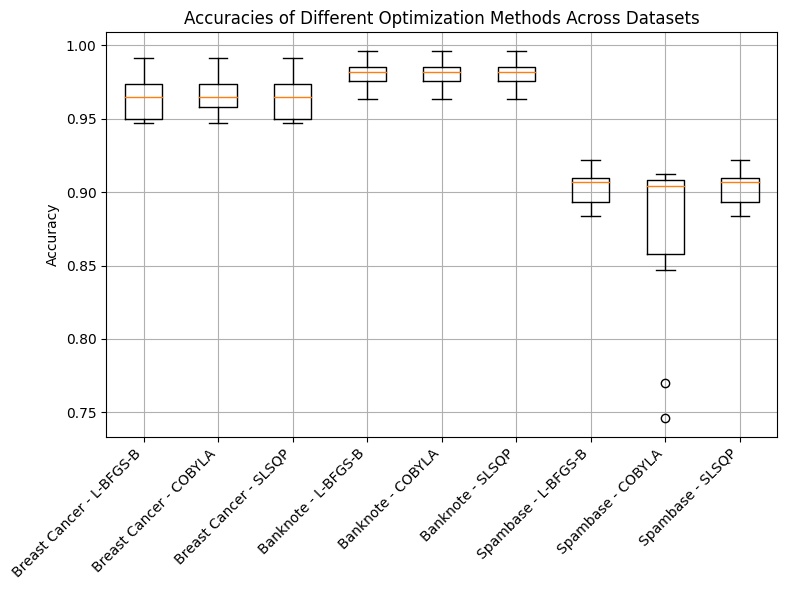

In [62]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot(accuracies_data, labels=dataset_names)
ax.set_title('Accuracies of Different Optimization Methods Across Datasets')
ax.set_ylabel('Accuracy')
ax.set_xticklabels(dataset_names, rotation=45, ha='right')
plt.grid()
plt.tight_layout()
plt.show()